<font size=6><b>Seminar 6 - Optimization</b></font><br/>
<font size=5>2022-12-15</b><br/>
<font size=3>Michal Kubišta<br/>
    <kubistmi@gmail.com></font>

# Content
<font size=3>
    <ol>
        <li>Bellman equation on Ramsey model</li>
        <li>Neural networks</li>
    </ol>
</font>

In [ ]:
from ipywidgets import IntProgress

import random as rd

import numpy as np
import matplotlib.pyplot as plt
import jax as j
import jax.numpy as jnp
from jax import grad, jit

---
# Bellman equation on Ramsey model
---

## Bellman equation:  
$V(k_t)=\underset{k_{t+1}}{\operatorname{max}}(u(f(k_t)-k_{t+1})+\beta V(k_{t+1}))$  

Iterations:  
$V_{j+1}(k_t) = \underset{k_{t+1}}{\operatorname{max}}(u(f(k_t) - k_{t+1}) + \beta V_j(k_{t+1}))$

In [ ]:
    kspace = np.arange(0, 11, 1)
    ksize = len(kspace)

    V_old = np.zeros(ksize)
    V_new = np.zeros([ksize, ksize])

In [ ]:
def bellmanRam(A, alpha, beta, kspace, iters = 200, toler = 1e-6):
    ksize = len(kspace)

    V_old = np.zeros(ksize)
    V_new = np.zeros([ksize, ksize])

    for j in range(iters):
        diff = 0
        for t in range(ksize):             # over k_t
            kt = kspace[t]
            for t1 in range(ksize):         # over k_t1
                kt1 = kspace[t1]
                V_new[t,t1] = np.log(A*kt**alpha - kt1) + beta*V_old[t1]

            V_max, posmax = (np.nanmax(V_new, axis = 1),
                             np.argmax(V_new, axis = 1))
            diff += abs(V_max[t] - V_old[t])

        if diff <= toler:
            break
        else:
            V_old = V_max
            kopt = kspace[posmax]
    return(kspace, kopt, j)

In [ ]:
kspace, kopt, i = bellmanRam(A = 10, alpha = 0.32, beta = 0.83, kspace = np.arange(2, 10, 0.05))

In [ ]:
i

107

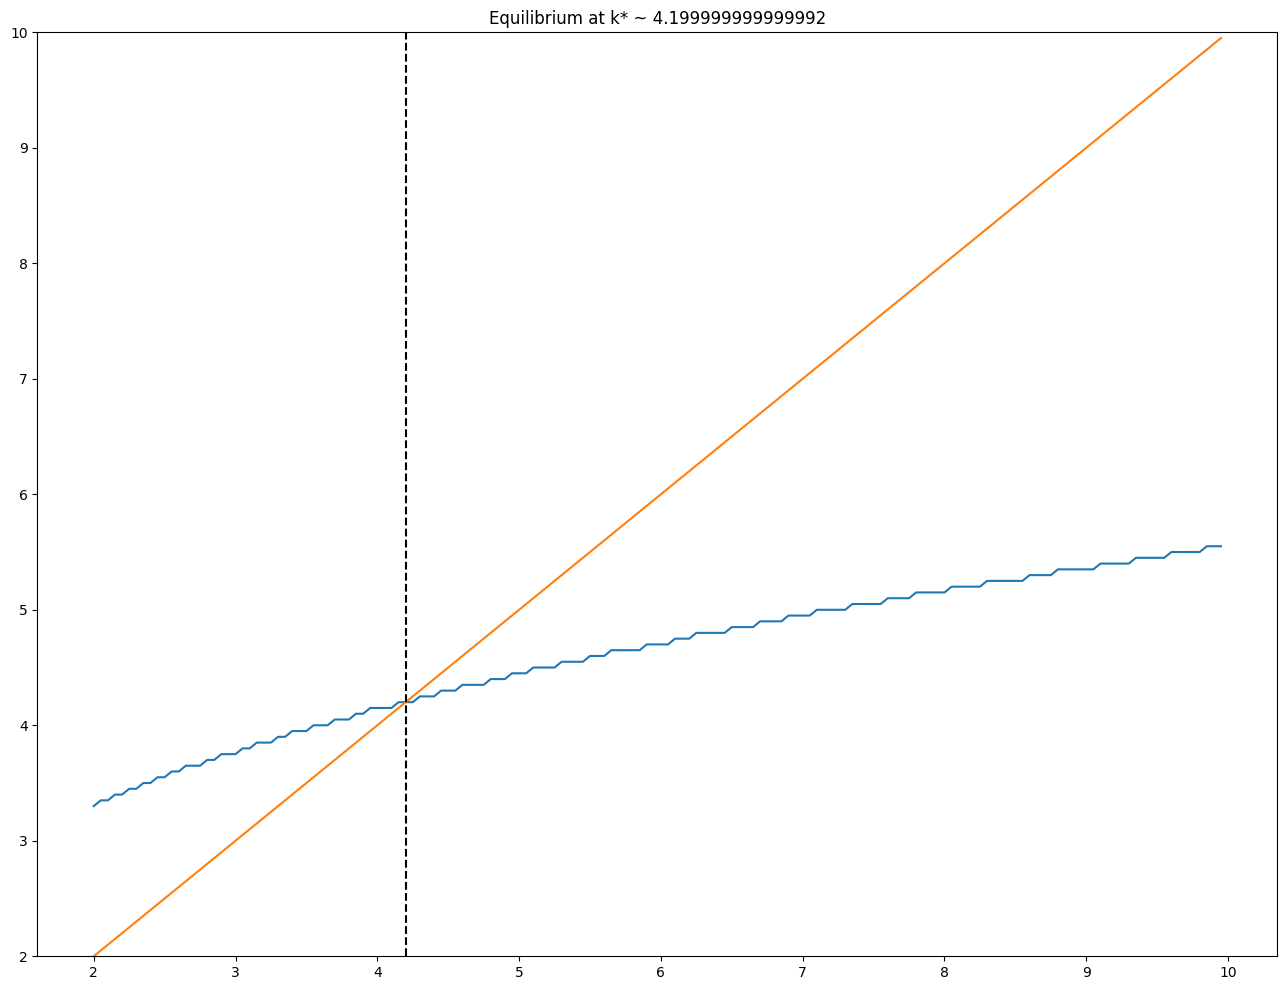

In [ ]:
fig = plt.figure(figsize=(16, 12))
plt.title('Equilibrium at k* ~ ' + str(kspace[kopt == kspace].mean()))
plt.plot(kspace, kopt)
plt.plot(kspace, kspace)
_ = plt.ylim(2,10)
_ = plt.vlines(kspace[kopt == kspace].mean(), 2, 10, linestyles = 'dashed', color = 'black')

---
# Neural networks
---

## Introduction
- aritificial neural networks, deep learning, AI
- basic terminology
    - neuron
    - layers
        - input, hidden, output
    - bias, weights, activation function

## A network of neurons
**input = variable**  
**weight = coefficient**  
**bias = intercept**  

<img src = "https://miro.medium.com/max/1000/1*ysUVjIIZiHVIkdtZqsGFXQ.png"/>

## Perceptron
$$ h_{11} = ActFun(\sum(w_i  x_i) + b_1) = ActFun(w_1  x_1 + w_2 x_2 + ... + w_n  x_n + b_1)$$

<img src="https://images.deepai.org/glossary-terms/perceptron-6168423.jpg" width="400" heigth="400" />

## Activation functions
- step function
- linear
- sigmoid $$f(x) = \frac{1}{1+e^{-x}}$$
- tanh $$f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
- ReLU
$$f(x) = \begin{cases} 0 & \text{if $x < 0$} \\ x & \text{if $x \ge 0$} \end{cases}$$

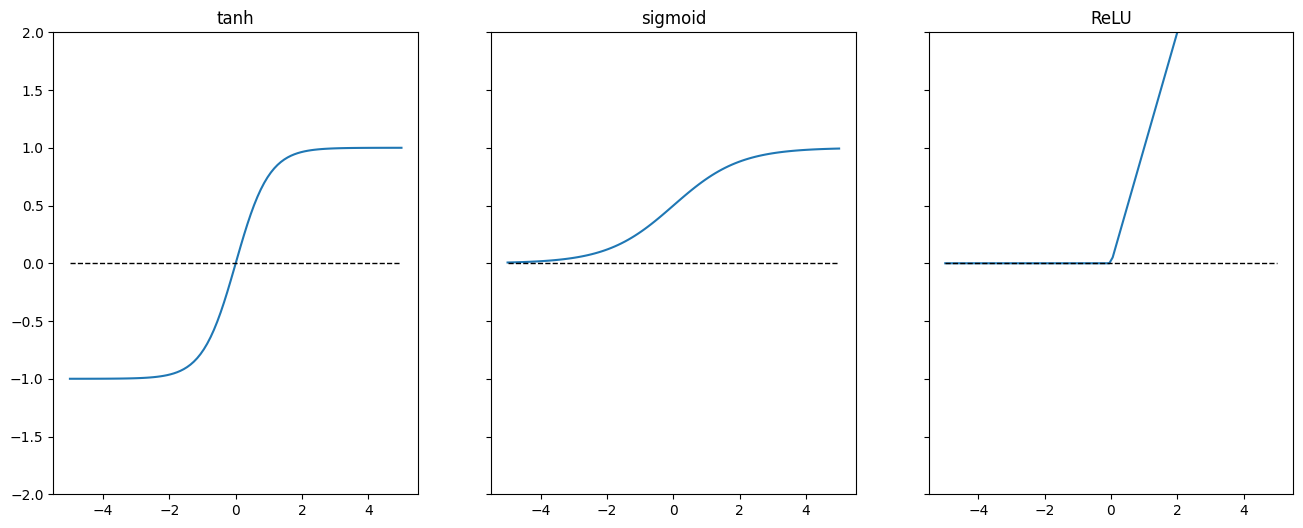

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16,6))
plt.ylim(-2,2)

xmin, xmax = -5, 5
xvals = jnp.linspace(xmin, xmax, 100)

ax1.set_title('tanh')
ax1.plot(xvals, [jnp.tanh(i) for i in xvals])
ax1.hlines(0, xmin, xmax, linestyles = 'dashed', color = 'black', linewidths = 1)

ax2.set_title('sigmoid')
ax2.plot(xvals, [j.nn.sigmoid(i) for i in xvals])
ax2.hlines(0, xmin, xmax, linestyles = 'dashed', color = 'black', linewidths = 1)

ax3.set_title('ReLU')
ax3.plot(xvals, [j.nn.relu(i) for i in xvals])
ax3.hlines(0, xmin, xmax, linestyles = 'dashed', color = 'black', linewidths = 1)
display()

## Types
<img src="https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019.png" width="200" height="200" />

- different neuron types
- different processing methods
- different activation functions

## Backpropagation
how to trace the error back to the weight (bias) that affects it the most?

$$ h_{11} = ActFun(\sum(w_{11i}  x_i) + b_1) = ActFun(w_{111}  x_1 + w_{112} x_2 + ... + w_{11n}  x_n + b_1)$$

$$ h_{21} = ActFun(\sum(w_{21i}  h_{1i}) + b_2) = ActFun(w_{211}  h_{11} + w_{212} h_{12} + ... + w_{11n}  h_{1n} + b_2)$$

$$ w_{211}  h_{11} = w_{211} ActFun(w_{111}  x_1 + w_{112} x_2 + ... + w_{11n}  x_n + b_1)$$

## Error as a function
$E(\hat y_i, y_i) = \sum(w_{31i}  h_{2i}) + b_3 - y_i$  

$\frac{E(\hat y_i, y_i)}{\partial w_{31i}} = h_{2i}$  

$\frac{h_{21}}{\partial w_{21i}} = \frac{ActFun}{\partial w_{21i}} h_{1i}$

In [ ]:
def neuron(inputs, w, b, activation = 'linear'):
    output = jnp.dot(inputs, w) + b
    if activation != 'linear':
        output = activation(output)
    return output

In [ ]:
def randar(size, key = j.random.PRNGKey(0)):
    return j.random.uniform(key, size)

In [ ]:
key = j.random.PRNGKey(0)

indim = 10
l1_dim = 5
l2_dim = 3

inputs = randar([indim])
target = 26

weights1 = randar([l1_dim,indim])
bias1 = randar([1])

weights2 = randar([l2_dim,l1_dim])
bias2 = randar([1])

weights3 = randar([1,l2_dim])
bias3 = randar([1])

params = [[weights1, bias1], [weights2,bias2], [weights3, bias3]]

In [ ]:
inputs

Array([0.35490513, 0.60419905, 0.4275843 , 0.23061597, 0.32985854,
       0.43953657, 0.25099766, 0.27730572, 0.7678207 , 0.71474564],      dtype=float32)

In [ ]:
layer1 = [neuron(inputs, w, bias1) for w in weights1]
layer1

[Array([2.2515745], dtype=float32),
 Array([2.4563768], dtype=float32),
 Array([2.1709838], dtype=float32),
 Array([3.425983], dtype=float32),
 Array([2.0305135], dtype=float32)]

In [ ]:
def forward(params, inputs):
    for w, b in params:
        inputs = jnp.concatenate([neuron(inputs, ws, b, j.nn.relu) for ws in w])
    return(inputs)

forward(params, inputs)

Array([14.484389], dtype=float32)

In [ ]:
def mse_loss(params, inputs, target):
    return jnp.sqrt(jnp.mean((forward(params, inputs)[0] - target)**2))

mse_loss(params, inputs, target)

Array(11.515611, dtype=float32)

In [ ]:
@jit
def backprop(params, inputs, target, learning_rate):
    grads = grad(mse_loss)(params, inputs, target)
    return [(w - learning_rate * dw, b - learning_rate * db) for (w, b), (dw, db) in zip(params, grads)]

In [ ]:
params[0]

[Array([[0.42271078, 0.10988367, 0.17936432, 0.557727  , 0.5007241 ,
         0.22675169, 0.2110933 , 0.54872036, 0.4301901 , 0.8549892 ],
        [0.40325677, 0.21874166, 0.65812516, 0.7035849 , 0.08702171,
         0.0146271 , 0.39282465, 0.9139857 , 0.6217127 , 0.63578844],
        [0.35615385, 0.60827816, 0.8881558 , 0.3827777 , 0.03948212,
         0.94029844, 0.2988342 , 0.5517082 , 0.09887683, 0.08440983],
        [0.7204071 , 0.67677045, 0.51662374, 0.47618616, 0.62078416,
         0.5653542 , 0.4790753 , 0.8785478 , 0.9574187 , 0.6435374 ],
        [0.17340672, 0.45538437, 0.7655853 , 0.8188056 , 0.16407394,
         0.37448525, 0.07771182, 0.45887375, 0.1897943 , 0.34695685]],      dtype=float32),
 Array([0.41845703], dtype=float32)]

In [ ]:
backprop(params, inputs, target, 0.2)[0]

(Array([[0.49690384, 0.23619175, 0.268751  , 0.60593736, 0.56968117,
         0.318637  , 0.26356447, 0.60669124, 0.59070337, 1.004407  ],
        [0.5220267 , 0.42093846, 0.8012174 , 0.7807612 , 0.19740975,
         0.16171919, 0.4768217 , 1.0067868 , 0.8786659 , 0.87498   ],
        [0.41842732, 0.714294  , 0.963182  , 0.42324275, 0.0973608 ,
         1.0174218 , 0.34287554, 0.6003657 , 0.23360261, 0.20982277],
        [0.79065555, 0.79636306, 0.6012579 , 0.5218333 , 0.686075  ,
         0.65235424, 0.52875674, 0.9334365 , 1.1093979 , 0.7850111 ],
        [0.22606972, 0.5450391 , 0.8290329 , 0.8530258 , 0.21302038,
         0.4397064 , 0.11495639, 0.50002205, 0.30372825, 0.4530152 ]],      dtype=float32),
 Array([1.4839472], dtype=float32))

In [ ]:
iters = 3000
f = IntProgress(min = 0, max = iters)
display(f)

pars = params
for i in range(iters):
    f.value += 1
    pars = backprop(pars, inputs, target, 0.05)
    if mse_loss(pars, inputs, target) < 0.001:
        break

IntProgress(value=0, max=3000)

In [ ]:
print('Iterations:           ' + str(i))
print('Final MSE:            ' + str(mse_loss(pars, inputs, target)))
print('Target value:         ' + str(target))
print('Prediction:           ' + str(forward(pars, inputs)))

Iterations:           255
Final MSE:            0.0004234314
Target value:         26
Prediction:           [26.000423]
